In [23]:
# Business Case
# Assuming you are working in a hospital as a data sceintist
# You need to predict if a person has alzhemier or not (there are 4 categories).
# You are to create the predictive model using machine learning model (CNN) and Orange and compare the results between them with explanation.
# Please use the data from kaggle: 
# https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images

# measurement is accuracy
# random state is 1
# Use seaborn heatmap and matplotlib plot.
# you are required to plot loss and accuracy curve (with tail to ensure no underfitting) and not too long (to ensure no overfitting).
# you should start with the default parameter CNN layer (32 32 64 64 3,3 filter with activation relu, maxpool 2,2 with stride 2, MLP of 128)
# how to improve the results by change the parameter setting
# Qualitatively, explain the pros and cons of your model
# How to overcome the weakness of your models (future study)
# the important of your model to the hostpital

# Good luck, Enjoy doing your homework

In [24]:
train_root  = "/Users/apple/Desktop/NTU_Tri1/AN6001/Homework3/Alzheimer_Dataset/train"
test_root = "/Users/apple/Desktop/NTU_Tri1/AN6001/Homework3/Alzheimer_Dataset/test"

In [2]:
batch_size = 10

In [3]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)

test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


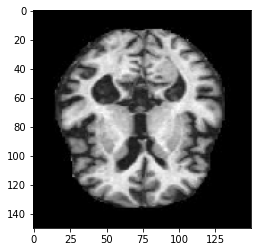

In [4]:
from matplotlib.pyplot import imshow
import os
#from keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import array_to_img

img = array_to_img(train_data[0][0][5])
imshow(img)

In [5]:
num_classes = len([i for i in os.listdir(train_root)])
num_classes

4

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [7]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
b=5
n=model.fit(train_data,batch_size=5,epochs=80)

Epoch 1/80
513/513 [==============================] - 58s 112ms/step - loss: 7.5915 - accuracy: 0.4573
Epoch 2/80
513/513 [==============================] - 59s 115ms/step - loss: 1.0740 - accuracy: 0.4901
Epoch 3/80
513/513 [==============================] - 60s 117ms/step - loss: 1.0542 - accuracy: 0.4946
Epoch 4/80
513/513 [==============================] - 55s 107ms/step - loss: 1.1590 - accuracy: 0.4774
Epoch 5/80
513/513 [==============================] - 56s 108ms/step - loss: 1.0608 - accuracy: 0.4979
Epoch 6/80
513/513 [==============================] - 57s 112ms/step - loss: 1.0461 - accuracy: 0.4999
Epoch 7/80
513/513 [==============================] - 57s 111ms/step - loss: 1.0461 - accuracy: 0.4923
Epoch 8/80
513/513 [==============================] - 62s 120ms/step - loss: 1.0546 - accuracy: 0.5022
Epoch 9/80
513/513 [==============================] - 60s 116ms/step - loss: 1.0400 - accuracy: 0.5007
Epoch 10/80
513/513 [==============================] - 55s 107ms/step - l

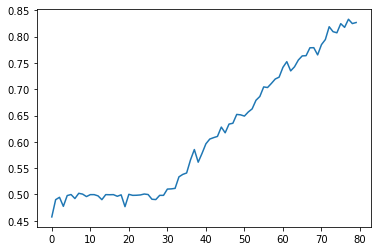

In [10]:
import matplotlib.pyplot as plt
plt.plot(n.history['accuracy'])

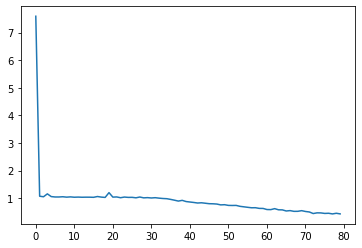

In [15]:
plt.plot(n.history['loss'])

In [16]:
import numpy as np
predict_x=model.predict(test_data) 
pred=np.argmax(predict_x,axis=1)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
cm

128/128 [==============================] - 3s 26ms/step


array([[ 38,   0,  66,  75],
       [  1,   2,   4,   5],
       [  6,   0, 529, 105],
       [ 10,   0, 196, 242]])

<AxesSubplot:>

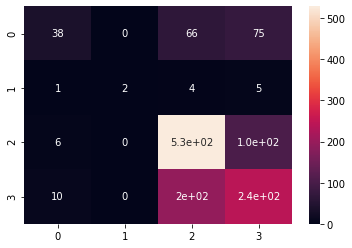

In [17]:
sns.heatmap(cm, annot=True)


In [18]:
print((cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(sum(sum(cm))))

0.63408913213448


In [22]:
import joblib
joblib.dump(model, "CNN_model.joblib.dat")

INFO:tensorflow:Assets written to: ram://57b1e924-b347-4f6a-981d-53ef2931862f/assets


INFO:tensorflow:Assets written to: ram://57b1e924-b347-4f6a-981d-53ef2931862f/assets


['CNN_model.joblib.dat']

**Compare the results between CNN and Orange model**<br>
In Orange, I used logistic regression and neural network to solve the problem. I also let the model learn from the training dataset and predict using test dataset. From orange, we can find the accuracy of train dataset of both models is very high (more than 95%), while the accuracy of the test dataset is just above 60%, indicating that overfitting occurs.<br>
For CNN model, the accuracy of training dataset is 82%, and the accuracy of test dataset is 63%. Thus, overfitting also occurs. In the future, we might try other hyperparameters to achieve better performance.<br>
Overall, the performance of CNN and Orange models is similar.<br>
**Qualitatively, explain the pros and cons of your model**<br>
*Pros*: <br>
CNN network shared convolution kernel, processing high-dimensional data without pressure;<br>
Feature extraction can be carried out automatically: the convolution layer can extract features, and the convolution kernel (filter) in the convolution layer plays the role of extracting the required features through convolution.<br>
*Cons*: <br>
Since the structure of CNN is very complex, it is very expensive (or time-consuming) to train a good model. On the other hand, the training set accuracy is 82%, while the test set accuracy is 63%. We can conclude that there exists the overfitting problem in my model.<br>
**How to overcome the weakness of your models (future study)**<br>
I applied CNN model to this problem. Since CNN has many hyperparameters. For example, we need to decide how many neurons in each layer, and the structure of the whole neural network. In my program, I only used the most general choice which is CNN structure (32 32 64 64). However, in order to improve the performance, we can use grid search or random search to find better hyperparameters and achieve better performance. <br>
**The important of your model to the hospital**<br>
As a data scientist, we can use CNN model to predict if a person has alzhemier or not. Considering that my model achieved good prediction accuracy, if the hospital applies my model, those who only at low risk of having alzhemier can avoid expensive tests diagnosing alzhemier which can also relieve hospital's manpower. In other words, my model can serve as a pre-check-up for alzhemier which enables medical resources to be directed to patients who are more likely at risk of alzhemier.